# Evaluation notebook 1
## proposed to observe the model performance in each model

## Contents:
- Load validation data
- Model evaluation

In [1]:
import os, sys
import tqdm
import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision.ops import sigmoid_focal_loss
from torch.utils.data import DataLoader
from torchvision.transforms import v2
from torcheval.metrics.functional import multiclass_f1_score
from sklearn.metrics import cohen_kappa_score, f1_score, jaccard_score, roc_auc_score, accuracy_score, auc

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, RocCurveDisplay, confusion_matrix, precision_recall_curve
from itertools import cycle

from model import *
from utils.evaluation import *
from APTOS_dataset import APTOS_dataset

c:\Users\USER\anaconda3\envs\deep_torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [12]:
img_dir = r'D:\Aj_Aof_Work\OCT_Disease\DATASET\APTOS2019_V2\images'
test_label_dir = r'D:\Aj_Aof_Work\OCT_Disease\DATASET\APTOS2019_V2\labels\test.csv'

transforms_test = v2.Compose([
                    v2.ToTensor(),
                    v2.Normalize([0.41333666, 0.22077196, 0.0735625], 
                                [0.23908101, 0.13196332, 0.04935341]), 
                    v2.Resize((256, 256))])

dataset = APTOS_dataset(img_dir, test_label_dir, transform=transforms_test, balancing=False)
test_loader = DataLoader(dataset, batch_size=32, shuffle=False, num_workers=6)

device = torch.device('cuda:0' if torch.cuda.is_available else 'cpu')

In [13]:
model_stocks = Call_Model(r'D:\Aj_Aof_Work\OCT_Disease\Grading\Training_results_Balance_data')

## Model evaluation

In [14]:
model_stocks = Call_Model(r'D:\Aj_Aof_Work\OCT_Disease\Grading\Training_results')
model_stocks.model_list

{0: 'densenet161_BalanceData_Imsampler_CEloss_GELU_v1',
 1: 'densenet161_BalanceData_Imsampler_CEloss_GELU_v1_combiantion',
 2: 'densenet161_BalanceData_Imsampler_CEloss_GELU_v2',
 3: 'densenet161_BalanceData_Imsampler_CEloss_GELU_v3',
 4: 'densenet161_BalanceData_Imsampler_CEloss_SELU_v1',
 5: 'densenet161_BalanceData_Imsampler_CEloss_SELU_v1_combiantion',
 6: 'densenet161_BalanceData_Imsampler_CEloss_SELU_v2',
 7: 'densenet161_BalanceData_Imsampler_CEloss_SELU_v3',
 8: 'densenet161_BalanceData_Imsampler_CEloss_v1_baseline',
 9: 'densenet161_BalanceData_Imsampler_CEloss_v1_larger',
 10: 'densenet161_BalanceData_Imsampler_CEloss_v2_larger',
 11: 'densenet161_BalanceData_Imsampler_CEloss_v3_larger'}

In [19]:
model = model_stocks.load_model(9)

actual_lst, pred_lst = test_model(model, test_loader, device)

print(classification_report(actual_lst, pred_lst))
# print(multiclass_f1_score(actual_lst, pred_lst, num_classes=5))
print('Number of parameters:', sum(p.numel() for p in model.parameters()))
print('Number of learnable parameters:', sum(p.numel() for p in model.parameters() if p.requires_grad))

100%|██████████| 5/5 [00:10<00:00,  2.09s/it]

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.66      0.66      0.66        29
           2       0.44      0.55      0.49        29
           3       0.50      0.48      0.49        29
           4       0.62      0.45      0.52        29

    accuracy                           0.61       145
   macro avg       0.62      0.61      0.61       145
weighted avg       0.62      0.61      0.61       145

Number of parameters: 29574033
Number of learnable parameters: 3102033


[]

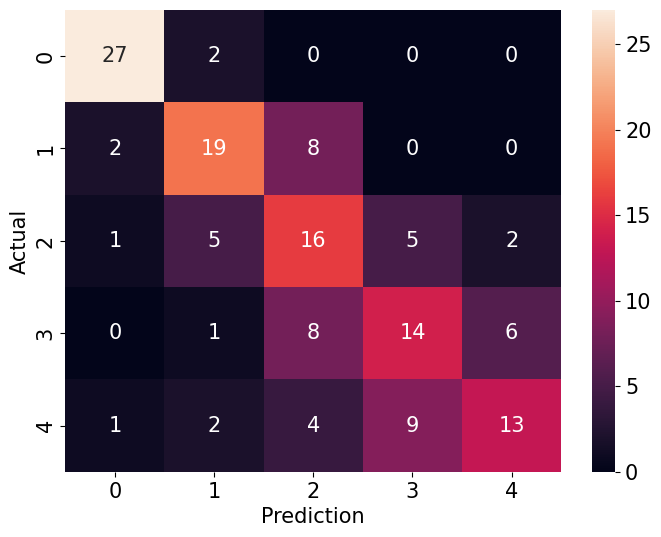

In [20]:
cm = confusion_matrix(actual_lst, pred_lst)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.3g')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.plot()